In [1]:
#####################################################################################################################################
##                                                                                                                                 ##
##                                                                                                                                 ## 
##                                                    Loading of Packages                                                          ##
##                                                                                                                                 ##
##                                                                                                                                 ##
##                                                                                                                                 ##   
#####################################################################################################################################
from scipy import signal
import numpy as np
import pandas as pd
import math as m
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm

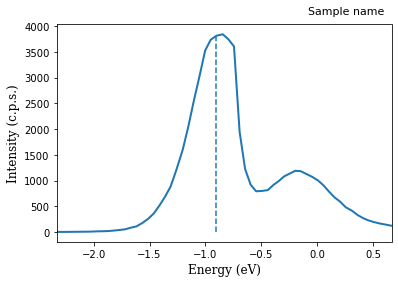

In [9]:
#####################################################################################################################################
##                                                                                                                                 ## 
##                                                    CALIBRATION SCAN                                                             ##
##                                                                                                                                 ##
#####################################################################################################################################

Directorio = "C:/Users/renea/Desktop/"
File = "Calibration.txt"

Data = Directorio + File

################## Data Loading

DataMS = pd.read_csv(Data, sep='\t')
DataMS_arr = DataMS.to_numpy()
MS_arr = DataMS_arr[0:,1:3]

################ Axis selection
x = MS_arr[0:,0]*(-1)
y = MS_arr[0:,1]

############### Peak detection module

peak_widths = np.arange(1, 600)
peak_indices = signal.find_peaks_cwt(y, peak_widths)
peak_count = len(peak_indices)

############### Plot display
plt.plot(x,y, linewidth = 2)

############## Plot customs

plt.vlines(x[peak_indices], ymin = 0, ymax = max(y),linestyle = "--", linewidth=1.5)
plt.xlim(min(x),max(x))
plt.xlabel("Energy (eV)", color = "black", family = "Serif", fontsize = 12)
plt.ylabel("Intensity (c.p.s.)", color = "black", family = "Serif", fontsize = 12)


#############      Text over the plot 

plt.text(max(x)-0.25*(max(x)-min(x)),1.10*(max(y)),"Sample name", fontsize = 11)
#plt.text(max(x)-0.40*(max(x)-min(x)),0.97*max(y), "Correction =          eV", fontsize = 12)
#plt.text(max(x)-0.17*(max(x)-min(x)),0.97*max(y), (-1)*float("{0:.2f}".format(x[peak_indices[0]])), fontsize = 12)
#plt.text(max(x)-0.35*(max(x)-min(x)),0.87*max(y), "FWHM = ", fontsize = 12)

calibre02mar = x[peak_indices[0]]* (-1)

##############  Plot file saving 

plt.savefig("C:/Users/renea/Desktop/Calibration_sample.png", dpi=350)

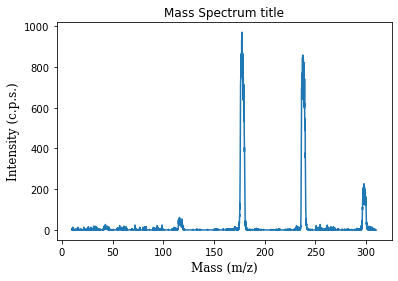

In [16]:
#####################################################################################################################################
##                                                                                                                                 ## 
##                                                         MASS SPECTRUM Simple                                                    ##
##                                                                                                                                 ## 
#####################################################################################################################################

DataMS = pd.read_csv("C:/Users/renea/Desktop/MS_sample.asc", sep='\t', skiprows=0)
DataMS = DataMS.to_numpy()
DataMS = DataMS[0:,0:] 

plt.xlabel("Mass (m/z)", color = "black", family = "Serif", fontsize = 12)
plt.ylabel("Intensity (c.p.s.)", color = "black", family = "Serif", fontsize = 12)
plt.title("Mass Spectrum title")


x = DataMS[0:,1]
y = DataMS[0:,2]

plt.plot(x,y)

plt.savefig("C:/Users/renea/Desktop/MS_sample-a.png", dpi=350)